## Import Required Libraries

In [1]:
# Import Pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)


2.1.2.post2
0.16.1


## Loading the dataset

In [49]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder

# Define transformation to apply to the images
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize images to 224x224
    transforms.ToTensor(),           # Convert images to tensors
])

# Define paths to your train and validation data
train_path = 'train'
val_path = 'validation'

# Load the train and validation datasets using ImageFolder
train_data = ImageFolder(root=train_path, transform=transform)
test_data = ImageFolder(root=val_path, transform=transform)

In [50]:
len(train_data), len(test_data)

(41322, 13877)

In [51]:
image,label = train_data[2]
image, label

(tensor([[[0.9922, 0.9961, 0.9922,  ..., 1.0000, 0.9922, 1.0000],
          [0.9922, 1.0000, 0.9922,  ..., 0.9961, 0.9922, 1.0000],
          [0.9961, 0.9961, 0.9961,  ..., 0.9922, 0.9961, 1.0000],
          ...,
          [0.9961, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[0.9961, 0.9961, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [0.9961, 0.9961, 1.0000,  ..., 0.9961, 1.0000, 1.0000],
          [0.9922, 1.0000, 0.9961,  ..., 0.9961, 0.9961, 1.0000],
          ...,
          [1.0000, 1.0000, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          [0.9961, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[0.9961, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 0.9961, 0.9922,  ..., 0.9961, 0.9961, 1.0000],
          [1.0000, 0.9922, 0.9961,  ...,

In [52]:
class_names = train_data.classes
class_names

['Apple Braeburn',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Red',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Clementine',
 'Cocos',
 'Dates',
 'Granadilla',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'Mandarine',
 'Mango',
 'Maracuja',
 'Melon Piel de Sapo',
 'Mulberry',
 'Nectarine',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peach',
 'Peach Flat',
 'Pear',
 'Pear Abate',
 'Pear Monster',
 'Pear Williams',
 'Pepino',
 'Physalis',
 'Physalis with Husk',
 'Pineapple',
 'Pineapple Mini',
 'Pitahaya Red',
 'Plum',
 'Pomegr

In [53]:
# Check the shape of our images
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image Label: shape: {class_names[label]} ")


Image shape: torch.Size([3, 28, 28]) -> [color_channels, height, width]
Image Label: shape: Apple Braeburn 


Image shape:torch.Size([3, 28, 28])


Text(0.5, 1.0, '0')

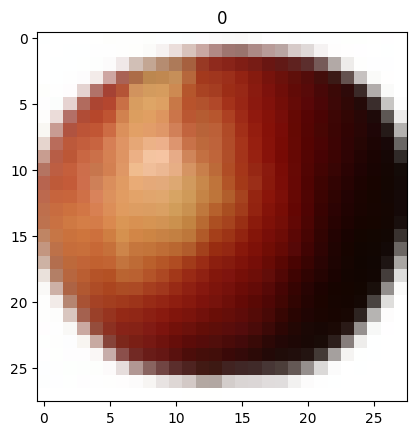

In [54]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape:{image.shape}")
image = image.permute(1, 2, 0)
plt.imshow(image)
plt.title(label)

In [55]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 41322
     Root location: train
     StandardTransform
 Transform: Compose(
                Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 13877
     Root location: validation
     StandardTransform
 Transform: Compose(
                Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

## Prepare dataloader

In [56]:
from torch.utils.data import DataLoader

# Set the batch size hyperparameter
BATCH_SIZE = 64

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                              batch_size = BATCH_SIZE,
                              shuffle = False)

In [57]:
# lets check what we've created
print(f"Dataloader: {train_dataloader, test_dataloader} ")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of train_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x17ff71cd0>, <torch.utils.data.dataloader.DataLoader object at 0x2c24dc9d0>) 
Length of train_dataloader: 646 batches of 64...
Length of train_dataloader: 217 batches of 64...


## Setup Device  

In [58]:
device = "mps"

### Function to calculate time elapsed

In [59]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end: float,
                     device: torch.device = None):
  """Print diff bet start and end time"""
  total_time = end- start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

## Defining Training and Testing Loop as train_step and test_step

In [60]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader"""
  train_loss, train_acc = 0,0
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X,y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true = y,
                             y_pred = y_pred.argmax(dim=1))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()



  # Divide total train_loss  and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc:{train_acc:.2f}% ")



In [61]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

  """Performs a testing loop step on model going over data_loader."""

  test_loss, test_acc = 0,0

  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
       # Put data to device
       X, y = X.to(device), y.to(device)

       # 1. Forward pass
       test_pred = model(X)

       # 2. Calcualte loss
       test_loss += loss_fn(test_pred, y)

       # 3. Caculate accuracy
       test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim=1))

    # Calculate the test loss avg per batch
    test_loss /= len(data_loader)


    # Calculate the test acc avg per batch
    test_acc /= len(data_loader)

    # pinrt out
    print(f"\n Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}% \n")

## Define our Custom Classifier Model

In [62]:
class FruitClassifierModel(nn.Module):
  """
  Model architecure that replicates the TinyVGG
  Model from CNN EXPLAINER
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape:int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1), # values we can set ourselves in our NN's are called hyperparameter
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1), # values we can set ourselves in our NN's are called hyperparameter
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7, # there's a trick to calculate this
                  out_features = output_shape),
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.conv_block_3(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

In [66]:
torch.manual_seed(42)
model_1 = FruitClassifierModel(input_shape = 3, # no. of channels of images
                               hidden_units=50,
                               output_shape = len(class_names)).to(device)

In [67]:
# Setup loss and optimizer and evaluation metrics
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

In [68]:
# Import tqdm for progress bar
from tqdm import tqdm

# set the seed and start the time
torch.manual_seed(42)
train_time_start_on_gpu = timer()

# Set the no. of epochs
epochs = 3

# Create optimization and evaluation loop using train_step and test_step
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch} \n-------")
  ### Training
  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  ### Testing
  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

# calculate the training time
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device = str(next(model_1.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0 
-------
Train loss: 3.49675 | Train acc:17.85% 


 33%|███▎      | 1/3 [00:27<00:55, 27.91s/it]


 Test loss: 2.19268 | Test acc: 41.15% 

Epoch:1 
-------
Train loss: 0.39920 | Train acc:89.81% 


 67%|██████▋   | 2/3 [00:52<00:25, 25.81s/it]


 Test loss: 0.51764 | Test acc: 88.57% 

Epoch:2 
-------
Train loss: 0.05482 | Train acc:98.83% 


100%|██████████| 3/3 [01:16<00:00, 25.40s/it]


 Test loss: 0.50161 | Test acc: 89.12% 

Train time on mps:0: 76.196 seconds


In [71]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device ):
  """ Returna dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Put data to device
      X,y = X.to(device), y.to(device)

      # make prediction
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred = y_pred.argmax(dim =1 ))

    # Scale loss and acc to find the avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)


  return {"model_name": model.__class__.__name__, # only works when model was created with class}
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 resutlst on test dataset

model_1_results = eval_model(model= model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

model_1_results

100%|██████████| 217/217 [00:11<00:00, 19.51it/s]


{'model_name': 'FruitClassifierModel',
 'model_loss': 0.501611053943634,
 'model_acc': 89.12010368663594}